In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install tensorflow==1.13.1

     |████████████████████████████████| 92.5MB 45kB/s 
     |████████████████████████████████| 3.2MB 6.5MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
     |████████████████████████████████| 368kB 52.9MB/s 
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [ ]:
!pip install keras_squeezenet

  Created wheel for keras-squeezenet: filename=keras_squeezenet-0.4-cp36-none-any.whl size=3594 sha256=b3f2016bd5f4fa3784a8f7a448d335f2b10afbe6719b2b2068f6c9ffa8b40cf7
  Stored in directory: /root/.cache/pip/wheels/79/e0/67/a459780ee91d17ae34e946a09641b4d943a3b1f29b2299ad79
Successfully built keras-squeezenet


In [ ]:
!pip install keras_applications

In [ ]:
!pip install keras==2.2.4

     |████████████████████████████████| 317kB 12.2MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from keras_squeezenet import SqueezeNet
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.layers import Activation, Dropout, Convolution2D, GlobalAveragePooling2D
from keras.models import Sequential
from keras.models import load_model

In [ ]:
def image_processing(image):
    # Convert from BGR to Grayscale
    grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Convert from BGR to HSV
    HSVImage = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) 

    # Finding pixels with itensity of skin
    lowerBoundary = np.array([0,40,30], dtype="uint8")
    upperBoundary = np.array([43,255,254], dtype="uint8")
    skinMask = cv2.inRange(HSVImage, lowerBoundary, upperBoundary)
    
    # Blurring of gray scale using medianBlur
    skinMask = cv2.addWeighted(skinMask, 0.5, skinMask, 0.5, 0.0)
    skinMask = cv2.medianBlur(skinMask, 5)
    skin = cv2.bitwise_and(grayImage, grayImage, mask = skinMask)
    
    # Canny edge detection
    canny = cv2.Canny(skin, 60, 60)

    return canny

In [ ]:
CLASS_MAP = {
    "a": 0, "b": 1, "c": 2, "d": 3, "e": 4, "f": 5, "g": 6, "h": 7, "i": 8, "j": 9, "k": 10, "l": 11, "m": 12,
    "n": 13, "o": 14, "p": 15, "q": 16, "r": 17, "s": 18, "t": 19, "u": 20, "v": 21, "w": 22, "x": 23, "y": 24, "z":25
}

NUM_CLASSES = len(CLASS_MAP)


def mapper(val):
    return CLASS_MAP[val]

In [ ]:
def get_model():
    model = Sequential([
        SqueezeNet(input_shape=(227, 227, 3), include_top=False),
        Dropout(rate = 0.5),
        Convolution2D(NUM_CLASSES, (1, 1), padding='valid'),
        Activation('relu'),
        GlobalAveragePooling2D(),
        Activation('softmax')
    ])
    return model

In [ ]:
# load images from the directory
dataset = []
path = '/content/gdrive/MyDrive/ISL-Dataset/image_data_processed'
for folder in os.listdir(path):
    folder_path = os.path.join(path, folder)
    for filename in os.listdir(folder_path):
        # to make sure no hidden files get in our way
        if filename.startswith("."):
            continue
        img = cv2.imread(os.path.join(folder_path, filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (227, 227))
        dataset.append([img, folder])


data, labels = zip(*dataset)
labels = list(map(mapper, labels))


# one hot encode the labels
labels = np_utils.to_categorical(labels)

In [ ]:
# define the model
model = get_model()
model.compile(
    optimizer=Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# start training
model.fit(np.array(data), np.array(labels), epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
5200/5200 [==============================] - 482s 93ms/step - loss: 2.2105 - acc: 0.3621
Epoch 2/10
5200/5200 [==============================] - 478s 92ms/step - loss: 0.5681 - acc: 0.8213
Epoch 3/10
5200/5200 [==============================] - 479s 92ms/step - loss: 0.1891 - acc: 0.9390
Epoch 4/10
5200/5200 [==============================] - 484s 93ms/step - loss: 0.1045 - acc: 0.9679
Epoch 5/10
5200/5200 [==============================] - 484s 93ms/step - loss: 0.0879 - acc: 0.9737
Epoch 6/10
5200/5200 [==============================] - 483s 93ms/step - loss: 0.1086 - acc: 0.9671
Epoch 7/10
5200/5200 [==============================] - 479s 92ms/step - loss: 0.0973 - acc: 0.9735
Epoch 8/10
5200/5200 [==============================] - 479s 92ms/step - loss: 0.1212 - acc: 0.9669
Epoch 9/10
5200/5200 [==============================] - 477s 92ms/step - loss: 0.3579 - acc: 0.9223
Epoch 10/10
5200/5200 [=============================

In [ ]:
# Save the model for later use
model.save("/content/gdrive/MyDrive/ISL-Dataset/model.h5")

In [ ]:
# Load the model
model = load_model("/content/gdrive/MyDrive/ISL-Dataset/model.h5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [ ]:
REVERSE_CLASS_MAP = {
    0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h', 8: 'i', 9: 'j', 10: 'k', 11: 'l', 12: 'm',
    13: 'n', 14: 'o', 15: 'p', 16: 'q', 17: 'r', 18: 's', 19: 't', 20: 'u', 21: 'v', 22: 'w', 23: 'x', 24: 'y', 25: 'z'
}

def rev_mapper(val):
    return REVERSE_CLASS_MAP[val]

In [ ]:
'''
# FOR PROCESSED IMAGE
# Prepare the image
img = cv2.imread('/content/gdrive/MyDrive/ISL-Dataset/test/test_processed/4.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (227, 227))

# Predict the letter
pred = model.predict(np.array([img]))
code = np.argmax(pred[0])
letter = rev_mapper(code)

print("Predicted: {}".format(letter))
'''

In [ ]:
from google.colab.patches import cv2_imshow

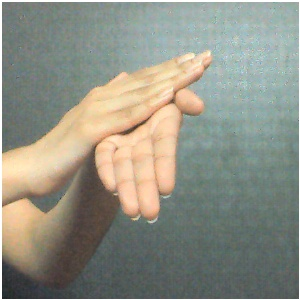

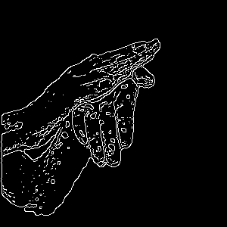

Predicted: h


In [ ]:
# FOR NOT PROCESSED IMAGE (ORIGINAL IMAGE)
# Prepare the image
img = cv2.imread('/content/gdrive/MyDrive/ISL-Dataset/test/test_data/5.jpg')
cv2_imshow(img)
img = image_processing(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (227, 227))
cv2_imshow(img)

# Predict the letter
pred = model.predict(np.array([img]))
code = np.argmax(pred[0])
letter = rev_mapper(code)

print("Predicted: {}".format(letter))